# Feature Relevance

In [354]:
import pandas as pd
import numpy as np

df = pd.read_csv("teamsClean.csv")

In [367]:
features = ['o_fgm','o_fga','o_ftm','o_fta','o_3pm','o_3pa','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_pts','d_fgm','d_fga','d_ftm','d_fta','d_3pm','d_3pa','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_blk','d_pts']

o_features = ['o_fgm','o_fga','o_ftm','o_fta','o_3pm','o_3pa','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_pts']

d_features = ['d_fgm','d_fga','d_ftm','d_fta','d_3pm','d_3pa','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_blk','d_pts']


# Separating out the features
x = df.loc[:, o_features].values

# # Separating out the target
y = df.loc[:, ['playoff']].values.ravel()

In [368]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


In [369]:
from sklearn.ensemble import RandomForestClassifier

seed = 42
model = RandomForestClassifier(random_state=seed)
model.fit(x, y)
feature_importances = model.feature_importances_

#select the n% most relevent features
threshold = sorted(feature_importances, reverse=True)[int(0.2 * len(feature_importances))]
relevant_features_indices = feature_importances > threshold
relevant_features = [feature for idx, feature in enumerate(o_features) if relevant_features_indices[idx]]

relevant_features


['o_fgm', 'o_asts', 'o_pf']

---
# PCA 

After discovering the most relevant features, we can reduce dimensionality even further

In [370]:
from sklearn.preprocessing import StandardScaler


features = relevant_features

# Separating out the features
x = df.loc[:, features].values

# # Separating out the target
y = df.loc[:, ['playoff']].values.ravel()

# # Standardizing the features
x = StandardScaler().fit_transform(x)

In [371]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [372]:
finalDf = pd.concat([principalDf, df[['playoff']]], axis = 1)

In [373]:
finalDf

,principal component 1,principal component 2,playoff
0,0.860177,-2.255621,0
1,2.629484,-0.665610,1
2,0.363984,-0.755518,0
3,-1.823094,0.119405,1
4,-1.027890,-0.250480,1
...,...,...,...
137,0.134166,-0.694620,0
138,2.685726,-1.237912,1
139,0.274263,-1.943272,0
140,0.424086,-1.759245,0


In [374]:
explained_variance

array([0.64514266, 0.28089846])

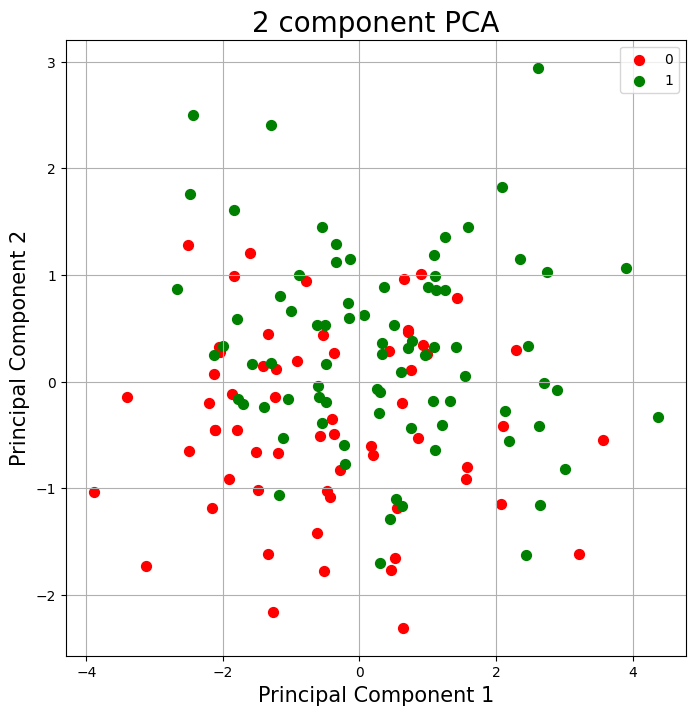

In [351]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['playoff'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()